### 4. 모드변수가 불확실한 경우의 하중 재생산

어떤 경우에는 FE 모델로 생산한 FRF(심지어 업데이트 한 것일지라도)도 특정 주파수 범위에서는 상당한 오차가 있을 수 있으며, 이러한 경우 앞서 기술한 하중 재생산 방법에 문제가 생길 수 있다. 이는 모델링 오차 때문이며, 모델링 오차가 측정 오차보다 훨씬 클경우, 주파수 역역에서 FRF는 더이상 정확히 추정될 수 없다. 본장에서는 모델링 오차의 크기가 주파수에 따라 다른 경우(즉, 공진에서 더 큰 경우)를 고려하기 위해 FRF에 대한 불확도가 아닌 모드 변수 크기 자체의 불확도를 고려한다. 따라서 이 알고리즘은 모델링 불확도와 하중재생산을 동시에 고려한다.

### 4.1 하중 재생산과 모델 업데이트의 복합 접근법 

모델의 불확도는 주어진주파수 범위에서 모드 변수들의 확률밀도함수 $p(\alpha)$를 부여하여 기술한다. 베이즈 법칙에 따르면 하중($F$), 모드변수($\alpha$), 측정 잡음의 분산($\sigma_N^{-2}$)의 결합확률분포는 다음과 같다.

$$p(F,\alpha,\sigma_N^{-2}|D)\propto p([Y]|F,\alpha,\sigma_N^{-2})p(F,\alpha,\sigma_N^{-2}|I) \tag{16}$$

하지만 이 복합적인 접근법은 알아내야 하는 변수들이 추가되어 식별 불가능한 문제가 될 수 있다. 왜냐하면 하중과 모드 변수에 대한 불확도는 서로 연관이 있어서 측정 값을 분리할 수 없게 되기 때문이다. 예를들면, $kF$와 $k^{-1}[H(\alpha)]$가 동등하게 문제의 해가 되는 임의의 계수 $k$가 존재하는 것은 명백하다. 이러한 식별 불가능의 문제를 해결하기 위한 한 방법으로, 하중 스펙트럼에대한 추가적인 사전 정보를 도입하는 방법이 있다. 알지 못하는 하중 스펙트럼을 적절한 기저 함수로 확장하는 방법을 사용할 수 있다. 예를들어, 충격 하중은 주파수 영역에서 매우 부드러운 기저함수 몇개로 표현이 가능하다. 주기적 하중의 경우 delta impulse 몇개로 표현 가능하다.  이러한 구속조건을 도입하여 - 이는 문제의 변수를 줄이는 것과 동등함 - 식별 물가능한 문제를 해결할 수 있다. 조금더 구체적으로, 알지 못하는 하중을 다음과 같은 표현으로 확장할 것이다.

$$F=[B]X=\eta \tag{17} $$

$B \in \mathbb{R}^{n_\omega \times n_x}$ : 적절히 선택된 기저함수

$n_x$ : 기저함수의 개수

$X \in \mathbb{C}^{n_x}$ :  복소수 계수 들의 벡터

$\eta$ : 잔차오차 벡터.  분산은 미지의 값인 $\sigma_\eta^2$이고, 평균이 0인 circular complex normal pdf를 따른다고 가정함.

## Algorithm 2

1. 각각의 사전 PDF로 부터 $X$, $\alpha$, $\sigma_N^{-2}$, $\sigma_{\eta}^{-2}$를 초기화 한다.

2. $F|\alpha,X,\sigma_N^{-2},\sigma_{\eta}^{-2},D\sim N_c(\hat{F},[\hat{C_F}])$를 샘플링한다.

### 5. 수치 및 실험 적용

제안한 하중 재생산 방법으로 수치 및 실험 예제를 소개하겠다.

### 5.1 수치 예제

모드가 불확실한 모델에 충격 하중이 가해졌을 때 4장에 기술된 접근법으로 이 충격하중을 재생산 하였다. 이 예제에서는 정확한 모델에 충격하중을 가해 가속도를 측정하였고, 이 측정한 가속도에 78.5 dB의 SNR로 잡음을 추가하였다. 그 결과는 그림2에 나타나 있다.

사전 모델은 4차 및 5차 modal residue에 40% 및 30%의 오차를 부여하고, 6, 7차 고유진동수를 30 Hz 만큼 이동시켜 만들었다. 실제 FRF 및 사전 FRF와 실제 FRF의 차이는 그림3에 나타나 있다. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


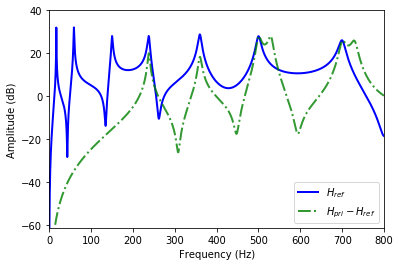

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 전달함수 정의 (식 (2))
def H(f,fn,ms,zeta):
    w = 2*np.pi*f; wn = 2*np.pi*fn;
    out = 0;
    nm = len(fn);
    for i in range(nm):
        out += (-w**2)*ms[i] / np.complex(wn[i]**2-w**2,2*zeta*wn[i]*w);
    return out
# dB 계산함수 정의
def dB(acc):
    return 20*np.log10(acc/1e-6);

# 고유진동수 정의 (논문 그림3 참고하여 구함)
fn_ref = np.array([17,59,150,238,360,500,700]);
nm = len(fn_ref);
# 모드형상 정의 (논문 그림3 참고하여 구함)
ms_ref = np.ones(nm)*1e-6;
ms_ref[3] *= -1; ms_ref[4] *= -1; ms_ref[6] *= -1;
ms_ref[0] *= 0.8; ms_ref[1] *= 0.8; ms_ref[2] *= 0.5; ms_ref[3] *= 0.5; ms_ref[4] *= 0.55; ms_ref[5] *= 0.5; ms_ref[6] *= 0.4;

fn_pri = np.copy(fn_ref); ms_pri = np.copy(ms_ref);
fn_pri[5] += 30; fn_pri[6] += 30;
ms_pri[3] *= 1.4; ms_pri[4] *= 1.3;
# 전달함수 계산
f = np.linspace(0,800,801*10);
zeta = 0.01;
H_ref = np.zeros(len(f),dtype='complex');
H_pri = np.zeros(len(f),dtype='complex');
for i in range(len(f)):
    H_ref[i] = H(f[i],fn_ref,ms_ref,zeta)
    H_pri[i] = H(f[i],fn_pri,ms_pri,zeta)
# H_pri - H_ref
dH1 = H_pri - H_ref
# dB 단위로 변환
mag_H_ref = dB(np.abs(H_ref)); mag_H_pri = dB(np.abs(H_pri));
mag_dH1 = dB(np.abs(dH1));
# Plotting
plt.plot(f,mag_H_ref,'b-',lw=2,label=r'$H_{ref}$');
plt.plot(f,mag_dH1,'g-.',lw=2,label=r'$H_{pri}-H_{ref}$',alpha=0.8);
plt.xlim(0,800); plt.ylim(-61.30,40); plt.legend(loc='lower right');
plt.xlabel('Frequency (Hz)'); plt.ylabel('Amplitude (dB)');

<h4>그림 3. $(H_{pri} - H_{ref})$와 $(H_{pos} - H_{ref})$를 비교하여 업데이트 한 모델

<h4>$H_{ref}$ : 실제 FRF $H_{pri}$ : 사전 FRF $H_{pos}$ : 사후 FRF

앞서 언급한 모드 변수들(4, 5차 modal residue, 6,7차 고유진동수)은 불확실한 요소로 간주하며, 다변수 정규분포 $N(\alpha_0,[C_\alpha])$를 따른다고 가정하였다. 그리고 평균은 $\alpha_0=[-0.7,-0.4,530,730]$로, 공분산 행렬은 $[C_\alpha]=diag(0.04,0.04,200,200)$으로 가정하였다. 행렬 공분산은 가능한 모든 모드변수 값들이 고려되도록 충분히 큰 값으로 설정하였다. 이 사전 모델을 사용하여 베이지안 추론을 통한 하중 복원을 수행할 것이다

In [3]:
alpha_0 = np.array([-0.7,-0.4,530,730]);
C_alpha = np.diag([0.04,0.04,200,200]);

복원할 하중이 스펙트럼 상에 regularity 하다는 특성이 있다. 따라서 10개의 르장드르 다항식을 사용하여 식(17)의 기저 행렬 $[B]$를 만들었다. 잔차 오차에 대한 사전정보 $(k_{\eta},\sigma_{\eta}^2)$와 측정 오차 $(k_N,\sigma_N^2)$는 모두 $(10,1)$로 설정하였다. MCMC 샘플링 알고리즘 2를 사용해 식(18)의 joint PDF로 부터 $n=10^4$의 샘플들을 샘플링 하였다. 그리고 처음 $10^3$개 샘플들은 burn-in phase 값들을 제거하기 위해 버렸다. 하중의 사후 평균 값 $F_{pos}$과 모든 불확실한 모드변수들은 이 샘플들로 부터 추정 가능하다. 그리고 사후 FRF ($H_{pos}$)는 업데이트 된 모드 변수들의 사후 평균 값을 사용하여 계산 가능하다. 그림 3은 실제 FRF $(H_{ref})$와 업데이트된 FRF 사이의 잔차 오차를 보여준다. 이는 사전 FRF $(H_{pri})$와의 잔차 오차보다 훨씬 작다. 업데이트된 FRF의 품질은 명백히 주파수에 대한 함수인 SNR에 따라 달라진다. 시간영역에서  사후 하중 $(f_{pos})$은 사후 평균 값 $(F_{pos})$의 역 푸리에 변환을 사용하여 얻을 수 있고, 그림4에서 실제 하중$(f_{ref})$과 비교하였다. 그림4를 보면 실제 하중과 사후 하중은 매우 잘 일치함을 볼 수 있다. 사전 모델을 사용해서도 하중을 재생산 하였고 이를 $(f_{pri})$로 표기하였다. 이는 첨두치에서 덜 정확함을 볼 수 있다.

최종적으로 식(20)을 사용하여 실수 및 허수부에 대하여 98% 베이지안 신뢰구간을 작성하였고, 그림5,6에 나타나 있다. 사후 모델을 사용하여 재생산한 하중은 사전 모델을 사용하여 재생산한 하중보다 전반적으로 기존 하중과 매우 잘 일치함을 볼 수 있다. 그림7,8은 $\sigma_N^2$과 $\sigma_{\eta}^2$에 대한 히스토그램을 나타내며, 샘플링 알고리즘이 잘 수렴하였음을 나타낸다.